# Linear Algebra Review

Here we will review some basic linear algebra that will help us discuss fundamentals throughout the semester.

We will use some basic Python libraries to help with this (`numpy` and `matplotlib`). If these are unfamiliar, that is ok. We will review Python and associated libraries in a later class.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

 ## Scalars

 A scalar is a quantity that can be represented as a single number.
 
 Scalars are usually represented by non-bold, italicized letters, such as $x$ or $A$. We will follow this convention in this class.
 
 Examples of scalars include:
 * The number $2$
 * The temperature outside
 * The mass of an object
 * The variable $x \in \mathbb{R}$
 * The constant $A \in \mathbb{R}$
 * The expected value of a real-valued distribution $\mathrm{E}[X]$


## Vectors

A vector is a collection of numbers (called elements) that cannot be reduced to a single number (i.e., cannot be represented as a scalar).

Vectors can have a finite or infinite number of components, and can be used to represent physical or purely mathematical quantities and objects. When used to represent physical quantities, vectors represent those quantities that have a magnitude and a direction, whereas scalars represent quantities that have only a magnitude.

The term vector can also be used in programming to refer to an array of numbers.

Vectors are usually represented using bold, italic fonts, e.g., $\boldsymbol{F}$. Vectors can also be represented with lines above symbols ($\bar{F}$), or with arrows above symbols ($\vec{F}$). We will follow the bold convention in this class.

Examples of vectors include:

* The quantity $\begin{pmatrix}1&2&3\end{pmatrix}$
* The direction a car is accelerating in and the magnitude of that acceleration $\boldsymbol{a} = \begin{pmatrix}a_x&a_y&a_z\end{pmatrix}$
* The force applied to an object $\boldsymbol{F} = m\boldsymbol{a}$
* A complex number $z = x + iy$
* The variable $\boldsymbol{x} = \begin{pmatrix}x_1&\cdots&x_N\end{pmatrix}$
* The weights of a discrete probability distribution, such as a 6 side weighted die with probabilities of each side occurring $\boldsymbol{p} = \frac{1}{12}\begin{pmatrix}1&2&3&3&2&1\end{pmatrix}$

A vector can have real or complex elements. Note that for a vector with complex elements, its elements can also be represented as vectors.

In some cases it is helpful to think of a function as a vector with infinitely many components (although this is not always rigorous).

Vectors can be written horizontally as row vectors,

$$
\boldsymbol{x} = \begin{pmatrix}x_1&\cdots&x_N\end{pmatrix},
$$

and vertically as column vectors,

$$
\boldsymbol{x} = \begin{pmatrix}x_1\\\vdots\\x_N\end{pmatrix}.
$$

We can describe the shape of a vector by describing the set of vectors it is drawn from. We use a blackboard bolded symbol to denote the type of scalars its elements are comprised of (e.g., integers, reals) and a pair of superscripts to denote the shape of the vector. The first superscript always denotes the number of rows and the second superscript always denotes the number of columns. Since a vector always represents a 1-dimensional array of elements, either the number of rows or the number of columns will always be 1.

To say that a vector is real valued and has a 1 row and 3 columns we write
$$
\boldsymbol{x} \in \mathbb{R}^{1\times3},\ \boldsymbol{x} = \begin{pmatrix}x_1&x_2&x_3\end{pmatrix}.
$$
To say that a vector is complex valued and has a 3 rows and 1 column we write
$$
\boldsymbol{z} \in \mathbb{C}^{3\times1},\ \boldsymbol{z} = \begin{pmatrix}z_1\\z_2\\z_3\end{pmatrix}.
$$

In Python, `numpy` is usually the library of choice for working with vectors. If `numpy` is unfamiliar, it will be reviewed in detail in a later class.


In [2]:
import numpy as np

example_array = np.array([1, 2, 3])
example_arange_array = np.arange(0, 1, 0.1)  # Start, Stop, Step
example_linspace_array = np.linspace(
    0, 1, 10
)  # Start, Stop, Number of Elements

print(example_array)
print(example_arange_array)
print(example_linspace_array)

[1 2 3]
[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


## Vector Operations

Performing operations on vectors is useful both for providing a concise description of potentially many arithmetic operations and for representing phenomena in the physical world. Some vector operations are performed elementwise (where each element of one vector is combined with each element of another vector to create a new vector of the same size and shape) and some vector operations are performed by applying a special order of operations.

### Transpose

Transposing a vector converts a row vector to a column vector.

$$
\begin{align*}
\boldsymbol{x} &= \begin{pmatrix}x_1&\cdots&x_N\end{pmatrix} \\
\boldsymbol{x}^\mathrm{T} &= \begin{pmatrix}x_1\\ \vdots \\ x_N\end{pmatrix}
\end{align*}
$$

Transpose is implemented in `numpy` with the `.T` operator. Note the example array has to be represented as a 2D array for the transpose operation to have an effect.

In [3]:
example_array = np.array(
    [
        [1, 2, 3],
    ]
)

print(example_array)
print(example_array.T)

[[1 2 3]]
[[1]
 [2]
 [3]]


## Euclidean Norm and $L^p$ Norm

The length of a vector has several definitions. The most intuitive is the L-2 norm, or Euclidean norm.

The Euclidean norm is the measure of distance we are most familiar with in the everyday space we live in.

To compute the distance between two points on a flat surface, $\boldsymbol{a} = (x_a, y_a),\ \boldsymbol{b} = (x_b, y_b)$, we are familiar with the formula

$$
\begin{align*}
d = \sqrt{{\Delta x}^2 + {\Delta y}^2}
\end{align*}
$$

where

$$
\begin{align*}
\Delta x &= x_b - x_a, \\
\Delta y &= y_b - y_a.
\end{align*}
$$

This familiar formula is called the L-2 Norm. For a vector

$$
\boldsymbol{x} = \begin{pmatrix}x_1&\cdots&x_N\end{pmatrix}
$$

the L-2 norm is defined

$$
\begin{align*}
\|\boldsymbol{x}\|_2 &= \sqrt{x \cdot x}, \\
        &= \sqrt{x^Tx}, \\
        &= \sqrt{\sum_i x_i^2}, \\
        &= {\left( x_1^2 + \cdots + x_N^2 \right)}^{1/2}. \\
\end{align*}
$$

More generally, we sometimes refer to an $L^p$ norm, defined by

$$
\begin{align*}
\|\boldsymbol{x}\|_p &= {\lparen x_1^p + \cdots + x_N^p \rparen}^{1/p}, \\
    &= {\left( \sum_i |x_i|^{p} \right)}^{1/p}.
\end{align*}
$$

Take the limit as $p \to \infty$ gives the $L^{\infty}$-norm,

$$
\|\boldsymbol{x}\|_{\infty} = \mathrm{max}\{|x_1|, \cdots, |x_N|\}.
$$


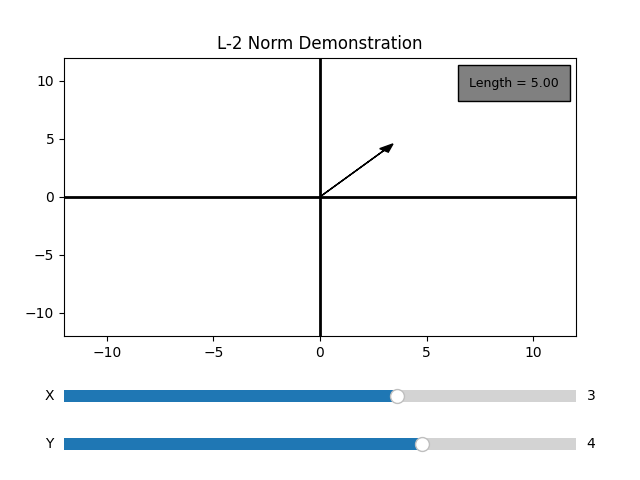

In [17]:
from linear_algebra_demonstrations import L2NormDemo

l2_norm_demo = L2NormDemo()
l2_norm_demo.instantiate_plot()

### Addition and Subtraction

Vectors are added and subtracted by adding or subtracting their elements.

$$
\begin{align*}
\boldsymbol{z} &= \boldsymbol{x} \pm \boldsymbol{y} \\
    &= \begin{pmatrix}x_1 \pm y_1 & \cdots & x_N \pm y_N\end{pmatrix}
\end{align*}
$$


In [5]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])
z = x + y
print(z)
z = x - y
print(z)

[2 4 6]
[0 0 0]


A scalar can also be added or subtracted to each element of a vector.

 $$
 \begin{align*}
 y &= \boldsymbol{x} \pm a,\ \boldsymbol{x} \in \mathbb{R}^{1 \times N},\ a \in \mathbb{R} \\
   &= \begin{pmatrix}x_1 \pm a&\cdots&x_N \pm a\end{pmatrix}
 \end{align*}
 $$

In [6]:
x = np.array([1, 2, 3])
a = 2
y = x + a
print(y)

[3 4 5]


### Scalar Multiplication and Division

A vector can be multiplied or divided by a scalar by applying the scalar multiplication or division to each element of the vector.

$$
\begin{align*}
\boldsymbol{y} &= a\boldsymbol{x}\\
  &= a\begin{pmatrix}x_1&\cdots&x_N\end{pmatrix} \\
  &= \begin{pmatrix}a x_1&\cdots&a x_N\end{pmatrix}
\end{align*}
$$

### Elementwise Multiplication and Division

Two vectors of the same shape can also be multiplied or divided elementwise. This is a common operation in computing. In math, this is called a Hadamard product. The Hadamard product is often denoted with a circle, i.e., $\circ$.

For two vectors
$$
\boldsymbol{x} = \begin{pmatrix}x_1&\cdots&x_N\end{pmatrix},\ \boldsymbol{y} = \begin{pmatrix}y_1&\cdots&y_N\end{pmatrix},
$$
their Hadamard product is given by
$$
\boldsymbol{x} \circ \boldsymbol{y} = \begin{pmatrix}x_1 y_1 & \cdots & x_N y_N\end{pmatrix}.
$$

It is important to be mindful of whether a `numpy` operation is implementing a matrix product or a Hadamard product.


In [7]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])
a = 2
x_times_a = x * a
x_times_y_elementwise = x * y
print(x_times_a)
print(x_times_y_elementwise)

[2 4 6]
[1 4 9]


### Dot Product

The dot product (also called inner-product) accepts two vectors of the same length as input and returns a scalar. The dot product is computed by performing an elementwise product and then computing the sum of the elements of the resulting vector.

For two vectors

$$
\begin{align*}
x = \begin{pmatrix}x_1&\cdots&x_N\end{pmatrix},\ y = \begin{pmatrix}y_1&\cdots&y_N\end{pmatrix}
\end{align*}
$$
the dot product is computed as
$$
\begin{align*}
\boldsymbol{x} \cdot \boldsymbol{y} &= \sum_{i=1}^N x_i y_i, \\
    &= x_1 y_1 + \cdots + x_N y_N.
\end{align*}
$$

Alternatively, the dot product can be thought of as a matrix multiplication,

$$
\boldsymbol{x} \cdot \boldsymbol{y} = \boldsymbol{x}^{\mathrm{T}}\boldsymbol{y}.
$$

The dot product is related to the angle between two vectors by

$$
\boldsymbol{x} \cdot \boldsymbol{y} = \| \boldsymbol{x} \| \| \boldsymbol{y} \| \cos \theta
$$

where $\theta$ is the angle between the two vectors.

The dot product is ubiquitous in machine learning with many applications, including:
* Multiplying a vector of weights $\boldsymbol{w}$ against a vector of inputs $\boldsymbol{x}$, i.e., $\boldsymbol{y} = \boldsymbol{w}\boldsymbol{x} + b$
* Checking the similarity between two vectors
* Use in the attention mechanisms of transformers

If some of these uses of the dot product are unfamiliar right now, that is ok. We will build up to them in later classes. For now it is important to be comfortable computing the dot product.

In [8]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])

x_dot_y = np.dot(x, y)

print(x_dot_y)

14


### Cross Product

The cross product or vector product accepts two vectors (usually three-dimensional vectors in Euclidean space) and returns a vector of the same size as output. The cross product is defined by

$$
\boldsymbol{x} \times \boldsymbol{y} = \|\boldsymbol{x}\| \| \boldsymbol{y} \| \sin \left(\theta\right) \boldsymbol{n}
$$

where $\theta$ is the angle between $\boldsymbol{x}$ and $\boldsymbol{y}$ in the plane they span and $\boldsymbol{n}$ is the unit vector perpendicular to $\boldsymbol{x}$ and $\boldsymbol{y}$, according to the right hand rule.

The cross product can most intuitively be thought of as producing the vector which points out of a plane given two vectors which span that plane. If this sounds ambiguous, it is! We use the right hand rule resolve the ambiguity. If we are computing $\boldsymbol{c} = \boldsymbol{a} \times \boldsymbol{b}$, then we can imagine $\boldsymbol{c}$ pointing in the direction of our thumb if $\boldsymbol{a}$ and $\boldsymbol{b}$ are pointing in the directions of our second and third fingers respectively.

The cross product has fewer applications in machine learning than the dot product. However, it is important in engineering, 3D graphics, and physics, and so it is encountered often in applied machine learning, and important to know for this reason.

## Matrices

A matrix is a rectangular array of numbers used to represent a mathematical or physical object, or the properties of a mathematical or physical object. Unlike a vector which can only have 1 row and $N$ columns, or $N$ rows and 1 column, a matrix can have $N$ rows and $M$ columns.

Matrices are usually denoted by capital letters. In this class, matrices will be capital letters, bolded and italicized, e.g., $\boldsymbol{A}$.

We can use a shorthand to denote the elements of a matrix, e.g.,

$$
\boldsymbol{A} = \begin{bmatrix}a_{ij}\end{bmatrix}_{1\leq i \leq N, 1 \leq j \leq M},
$$

which is equivalent to

$$
\boldsymbol{A} = \begin{pmatrix}
a_{1,1}& \cdots & a_{1,M} \\
\vdots& \ddots & \vdots \\
a_{N,1}& \cdots & a_{N,M} \\
\end{pmatrix}
$$

Matrices naturally arise anywhere it makes sense to organize data into a 2 dimensional grid. The following are all examples of matrices.

The position $\boldsymbol{p}=\begin{pmatrix}p_x&p_y&p_z\end{pmatrix}$ of an object measured at $N$ points in time can be represented as an $N \times 3$ matrix,

$$
\boldsymbol{P} =
\begin{pmatrix}
p_x(t_1) & p_y(t_1) & p_z(t_1) \\
\vdots & \vdots & \vdots \\
p_x(t_N) & p_y(t_N) & p_z(t_N) \\
\end{pmatrix}.
$$

The correlation of each pair of random variables, $X_i, X_j$ in a random vector of $N$ random variables, $\mathbf{X} = \begin{pmatrix}X_1&\cdots&X_N\end{pmatrix}$ can be represented as an $N \times N$ matrix,

$$
\boldsymbol{C} = \begin{bmatrix}c_{ij}\end{bmatrix}_{1 \leq i,j \leq N},\ c_{ij} = \mathrm{corr}\left(X_i, X_j\right).
$$


The adjacency matrix specifies, for a graph with $N$ vertices, whether or not each vertex is connected to each other vertex. For example,

$$
\boldsymbol{A} =
\begin{pmatrix}
0&1&1 \\
1&0&1 \\
1&1&0
\end{pmatrix},
$$

specifies a fully connected graph with $N=3$ vertices.

We can describe the shape of a matrix by describing the set of matrices it is drawn from. As with vectors, we use a blackboard bolded symbol to denote the type of scalars its elements are comprised of (e.g., integers, reals) and a pair of superscripts to denote the shape of the matrix. The first superscript always denotes the number of rows and the second superscript always denotes the number of columns.

To say that a matrix is real valued and has a 2 rows and 3 columns we write
$$
\boldsymbol{X} \in \mathbb{R}^{2\times3},\
\boldsymbol{X} = \begin{pmatrix}
    x_{1,1}&x_{1,2}&x_{1,3}\\
    x_{2,1}&x_{2,2}&x_{2,3}\\
\end{pmatrix}.
$$

Note that the subscripts of the indices follow the row, column convention.

To say that a matrix is complex valued and has a 3 rows and 2 columns we write

$$
\boldsymbol{Z} \in \mathbb{C}^{3\times2},\
\boldsymbol{Z} = \begin{pmatrix}
    z_{1,1}&z_{1,2}\\
    z_{2,1}&z_{2,2}\\
    z_{3,1}&z_{3,2}\\
\end{pmatrix}.
$$

In Python, `numpy` is usually the library of choice for working with matrices. Some basic examples are below. An in depth review will be covered in a later class.

In [9]:
example_array = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print(example_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


## Matrix Operations

Like vector operations, matrix operations are useful both for providing a concise description of potentially many arithmetic operations and for representing phenomena in the physical world. Also like vector operations, some matrix operations are performed elementwise (where each element of one matrix is combined with each element of another matrix to create a new matrix of the same size and shape) and some matrix operations are performed by applying a special order of operations. In general, formulating many arithmetic operations as matrix operations can help speed them up, by taking advantage of parallel computing techniques, like vectorized CPU operations or GPU operations. We will cover parallel operations in a later class, but for now it is helpful to know that one of the benefits of formulating computations as matrix operations is a speed benefit through parallel processing. 

### Addition and Subtractions

Like vectors, matrices are added and subtracted by adding and subtracting their elements.

Using shorthand notation, to perform

$$
\boldsymbol{Z} = \boldsymbol{X} \pm \boldsymbol{Y}
$$

we can add or subtract the elements,

$$
\begin{bmatrix}z_{ij}\end{bmatrix} = \begin{bmatrix}x_{ij} \pm y_{ij}\end{bmatrix}.
$$

Matrix addition and subtraction is straightforward with `numpy`.

In [10]:
x_example_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y_example_matrix = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
z_example_matrix = x_example_matrix + y_example_matrix
print(z_example_matrix)

[[ 2  3  4]
 [ 5  6  7]
 [ 8  9 10]]


### Scalar Multiplication and Division

Also like vectors, we can multiply or divide a matrix by a scalar by multiplying or dividing its elements by a scalar.

To perform the multiplication

$$
\boldsymbol{Y} = a\boldsymbol{X}
$$

we can multiply each element of $\boldsymbol{X}$ by $a$,

$$
\begin{bmatrix}y_{ij}\end{bmatrix} = \begin{bmatrix}a x_{ij}\end{bmatrix}.
$$

Scalar multiplication and division in `numpy` is performed by using Pythons multiplication (`*`) and division operators (`/`) to multiply or divide a matrix by a single number.

In [11]:
x_example_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a_example_constant = 10
y_example_matrix = x_example_matrix * a
print(y_example_matrix)

[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


### Elementwise Multiplication and Division

Elementwise multiplication or division of matrices is often called a Hadamard product. The Hadamard product is a common step in algorithms. For example, the Hadamard product can specify applying a mask to remove some elements of a matrix by setting them to 0.

As with vectors, the Hadamard product is denoted using a circle, $\circ$.

Using shorthand, the computation of the Hadamard product

$$
\boldsymbol{Z} = \boldsymbol{X} \circ \boldsymbol{Y}
$$

is given by

$$
\begin{bmatrix}z_{ij}\end{bmatrix} = \begin{bmatrix}x_{ij} y_{ij}\end{bmatrix}.
$$

In `numpy` the `*` operator specifies a Hadamard product.

In [12]:
x_example_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
y_example_matrix = np.array([[1, 1, 1], [0, 0, 0], [1, 1, 1]])
z_example_matrix = x_example_matrix * y_example_matrix
print(z_example_matrix)

[[1 2 3]
 [0 0 0]
 [7 8 9]]


### Matrix Multiplication

So long as the dot product is second nature, it is easy to define and compute matrix multiplication.

Order matters for matrix multiplication; i.e., matrix multiplication is not commutative.

Provided the left matrix has the same number of columns as the right matrix has rows, matrix multiplication is computed by taking the dot product of each row of the left matrix with each column of the right matrix.

For two matrices $\boldsymbol{R}$ and $\boldsymbol{C}$ where

$$
\begin{align}
\boldsymbol{R} &\in \mathbb{R}^{L \times M}, \\
\boldsymbol{C} &\in \mathbb{R}^{M \times N},
\end{align}
$$

the product $\boldsymbol{P} = \boldsymbol{R}\boldsymbol{C}$ is given by

$$
\begin{pmatrix}
r_1 \cdot c_1 & \cdots & r_1 \cdot c_N \\
\vdots & \ddots & \vdots \\
r_L \cdot c_1 & \cdots & r_L \cdot c_N
\end{pmatrix}

=
\begin{pmatrix}
\leftarrow & r_1 & \rightarrow \\
\vdots & \vdots & \vdots \\
\leftarrow & r_L & \rightarrow \\
\end{pmatrix}

\begin{pmatrix}
\uparrow & \cdots & \uparrow \\
\boldsymbol{c_1} & \cdots & \boldsymbol{c_N} \\
\downarrow & \cdots & \downarrow
\end{pmatrix}
$$

where $r_l \cdot c_n$ is the dot product of row $l$ in $\boldsymbol{R}$ with column $n$ in $C$.

Matrix multiplication can be performed in `numpy` using the `@` operator or the `dot()` function.

In [13]:
r_example_matrix = np.array([[1, 2, 3], [4, 5, 6]])
c_example_matrix = np.array([[1, 2], [3, 4], [5, 6]])
p_example_matrix_product = r_example_matrix @ c_example_matrix
print(p_example_matrix_product)
p_example_matrix_product_via_dot = np.dot(r_example_matrix, c_example_matrix)
print(p_example_matrix_product_via_dot)

[[22 28]
 [49 64]]
[[22 28]
 [49 64]]
